In [1]:
# python
from functools import partial

# Básicos
import numpy as np
import pandas as pd
import scipy.stats as stats

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocesamiento
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler

# Selección de modelo
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve, make_scorer,plot_confusion_matrix, ConfusionMatrixDisplay)

# Modelos
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Habilitar la recarga de archivos modificados
%load_ext autoreload
%autoreload 2

# Gráfica en linea
%matplotlib inline

# Hacerlo bonito
from rich.console import Console
from rich import inspect
con = Console()
ins = partial(inspect, methods=True)
%load_ext rich

## Parte 1: Preparación de los datos

In [2]:
df=pd.read_csv("churn.csv")
df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [4]:
df.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [5]:
df["Int'l Plan"]=df["Int'l Plan"].map({"yes":1, "no":0})
df["VMail Plan"]=df["VMail Plan"].map({"yes":1, "no":0})
df["Churn?"]=df["Churn?"].map({"True.":1, "False.":0})

df.head(3)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [6]:
y=df["Churn?"]

In [7]:
X= df.iloc[:, :-1]
X

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,68,415,370-3271,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,28,510,328-8230,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,184,510,364-6381,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [8]:
X= X.drop(columns=["Phone","State"])
X

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [9]:
X_train,X_test,y_train, y_test=train_test_split(X,y)

## Parte 2: Entrenar el modelo


In [10]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

print("The accuracy is", model.score(X_test, y_test))

The accuracy is 0.9460431654676259


In [11]:
!pip install graphviz

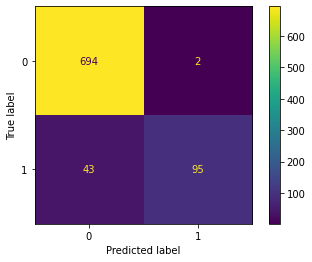

In [12]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [13]:
y_hat=model.predict(X_test)

In [14]:
precision_score(y_test, y_hat), recall_score(y_test, y_hat)

(0.979381443298969, 0.6884057971014492)

## Parte 3: Exploración

In [15]:
#from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ <ipython-input-15-daa1b7fab292>:2 in <module>                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

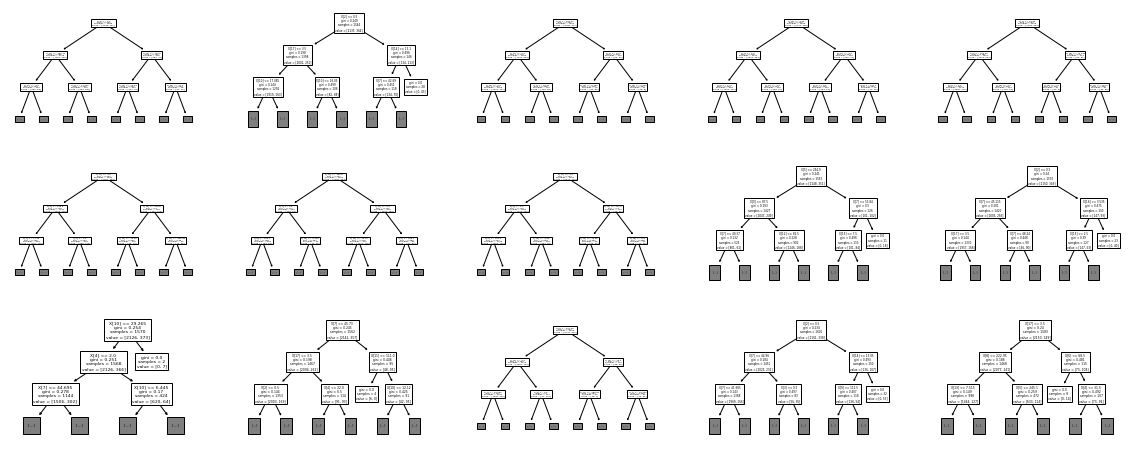

In [16]:
fig, axs=plt.subplots(3,5, figsize=(20,8))
axs=axs.flatten()
for i in range (15):
    tree=model.estimators_[i]
    plot_tree(model.estimators_[i], max_depth=2, ax=axs[i])

In [17]:
trees=np.arange(1,51) #Number of trees
accuracy=np.empty(50) #Matrix for acc

for i in range(50):
    model=RandomForestClassifier(n_estimators=trees[i]).fit(X_train, y_train)
    accuracy_v=model.score(X_test, y_test)
    accuracy[i]=accuracy_v
print(accuracy)             

[0.88009592 0.91726619 0.9028777  0.90647482 0.92925659 0.92086331
 0.9352518  0.93285372 0.93645084 0.92925659 0.92925659 0.93285372
 0.93165468 0.93764988 0.93884892 0.94604317 0.93884892 0.93165468
 0.941247   0.94244604 0.94724221 0.94484412 0.94364508 0.93405276
 0.941247   0.93285372 0.94004796 0.94244604 0.93884892 0.94004796
 0.94604317 0.93645084 0.941247   0.94004796 0.94364508 0.93884892
 0.94004796 0.94244604 0.941247   0.9352518  0.94724221 0.93884892
 0.93764988 0.94244604 0.94844125 0.93764988 0.94484412 0.9352518
 0.94004796 0.94004796]


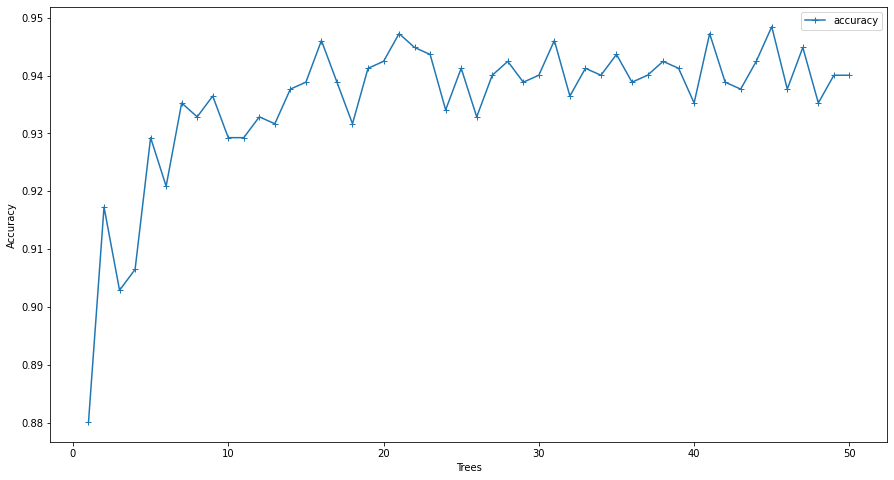

In [18]:
plt.figure(figsize=(15,8))
plt.plot(trees, accuracy, label="accuracy", marker="+")
plt.xlabel("Trees")
plt.ylabel("Accuracy")
plt.legend()          

In [19]:
accuracy_f=[]
features=len(X_train.columns)
r_features=range(1,features)
for i in r_features:
    model=RandomForestClassifier(max_features=i, n_estimators=33).fit(X_train, y_train)
    accuracy_f.append(model.score(X_test, y_test))

In [20]:
accuracy_f

[
    0.882494004796163,
    0.9172661870503597,
    0.9388489208633094,
    0.9364508393285371,
    0.9400479616306955,
    0.947242206235012,
    0.9496402877697842,
    0.9448441247002398,
    0.9436450839328537,
    0.9424460431654677,
    0.9448441247002398,
    0.947242206235012,
    0.9424460431654677,
    0.9424460431654677,
    0.9436450839328537,
    0.947242206235012,
    0.934052757793765
]

In [21]:
r_features

range(1, 18)

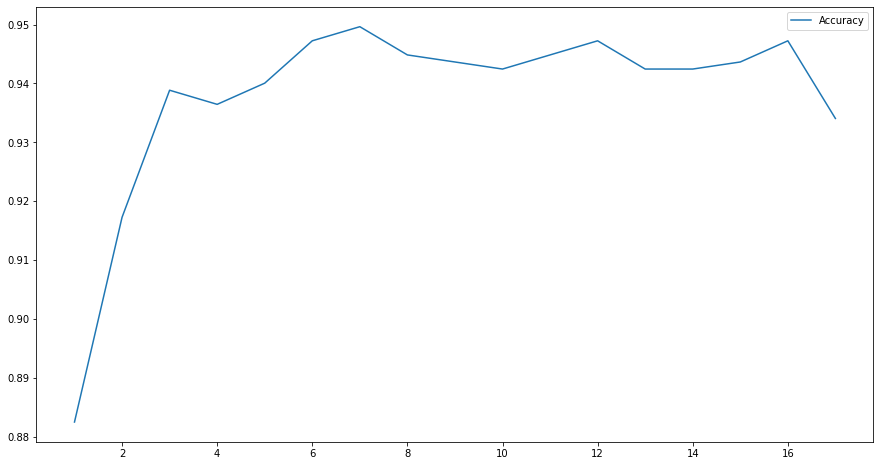

In [22]:
plt.figure(figsize=(15,8))
plt.plot(r_features, accuracy_f,label="Accuracy")
plt.legend()

In [23]:
#GRID SEARCH
params={"n_estimators": range(30,40,2),
        "criterion":["gini","entropy"],
        "max_depth": list(range(1,3)) + [None],
        "max_features":["log2","sqrt"],
       }
model=RandomForestClassifier()
gs=GridSearchCV(model, params, cv=5, n_jobs=1, verbose=1)
gs.fit(X_train, y_train)
gs.best_score_,gs.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


(
    0.9503791583166332,
    {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 32}
)

In [24]:
lr=LogisticRegression(max_iter=100).fit(X_train, y_train)
lr.score(X_test,y_test)

C:\Users\ilopezg\Anaconda3\envs\python_fundamentals\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8321342925659473

In [25]:
lir=LinearRegression().fit(X_train, y_train)
lir.score(X_test,y_test)

0.16835943453783497

In [26]:
lor_t=LogisticRegression(max_iter=1000, class_weight="balanced").fit(X_train, y_train)
lor_t.score(X_test,y_test)

C:\Users\ilopezg\Anaconda3\envs\python_fundamentals\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7661870503597122